In [ ]:
# prompt: drive

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

# Update the path to point to your directory
general_path = '/content/gdrive/MyDrive/audio classification'

# List the contents of the directory
print(list(os.listdir(general_path)))


['Gataberaya', 'Flue']


In [ ]:
import librosa
import numpy as np

# Define the new file path
new_audio_path = '/content/gdrive/MyDrive/audio classification/Gataberaya/Jith 4-5.wav'

# Importing the new file
y, sr = librosa.load(new_audio_path)

# Print the audio signal and its properties
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (Hz):', sr, '\n')

# Verify the length of the audio
print('Check Len of Audio (seconds):', len(y) / sr)


y: [0.00123964 0.00199119 0.00225786 ... 0.         0.         0.        ] 

y shape: (46242,) 

Sample Rate (Hz): 22050 

Check Len of Audio (seconds): 2.097142857142857


In [ ]:
ipd.Audio(data=y, rate=sr)

In [ ]:
import os

# Directory containing audio files
directory = '/content/gdrive/MyDrive/audio classification'

# List all classes (subdirectories)
classes = os.listdir(directory)
print("Classes:", classes)


Classes: ['Gataberaya', 'Flue']


In [ ]:

# Dictionary to hold audio files for each class
audio_data = {}

# Loop through each class and load audio files
for class_name in classes:
    class_dir = os.path.join(directory, class_name)
    # List audio files in the class directory
    files = os.listdir(class_dir)
    # Load audio files and store them in the dictionary
    audio_data[class_name] = [librosa.load(os.path.join(class_dir, file))[0] for file in files]

# Print the first few audio files for each class
for class_name, files in audio_data.items():
    print(f"Class: {class_name}")
    for i, file in enumerate(files[:3]):
        print(f"Audio {i+1}:", file)
        print("Shape:", np.shape(file))


Class: Gataberaya
Audio 1: [-0.00011149  0.00025658  0.00050135 ...  0.          0.
  0.        ]
Shape: (46242,)
Audio 2: [2.5681546e-04 1.8643355e-04 5.0471397e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
Shape: (46242,)
Audio 3: [-6.3907355e-05 -5.5905432e-05 -6.3151121e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
Shape: (46242,)
Class: Flue
Audio 1: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.1600706e-05
 -2.3544952e-04 -8.3576090e-04]
Shape: (46243,)
Audio 2: [-0.0025614  -0.00546885 -0.00479539 ...  0.          0.
  0.        ]
Shape: (46242,)
Audio 3: [-0.00308247 -0.00523996 -0.00586862 ...  0.          0.
  0.        ]
Shape: (46242,)


#2D Representation: Sound Waves¶


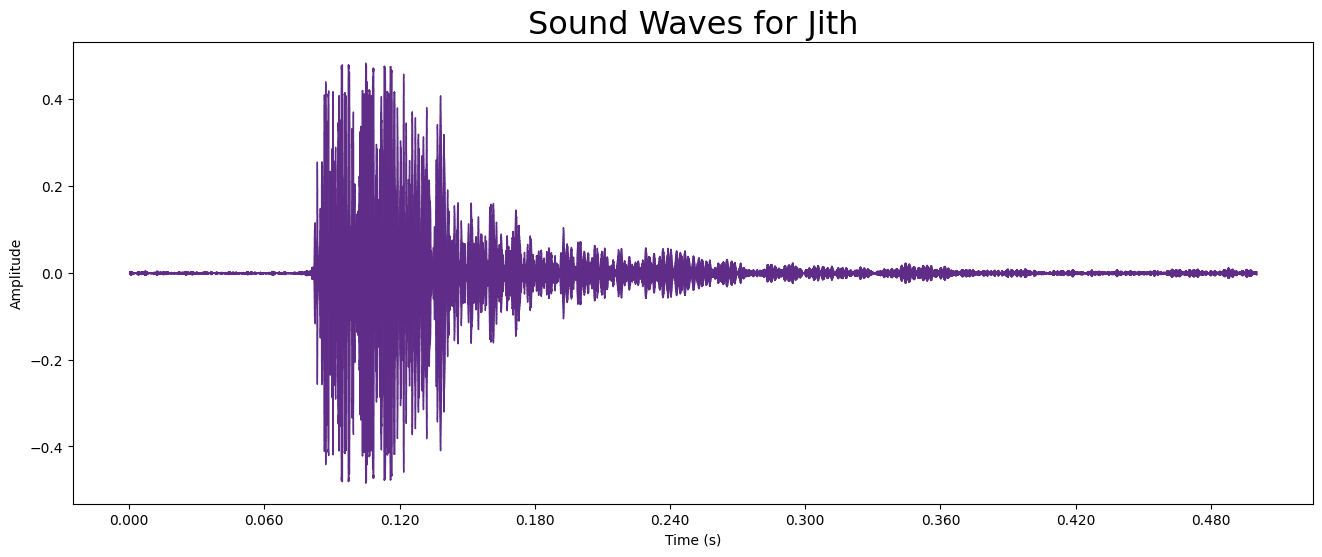

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define the file path
audio_file_path = '/content/gdrive/MyDrive/audio classification/Gataberaya/Jith 4-5.wav'

# Load the audio file
y, sr = librosa.load(audio_file_path)

# Plot the sound wave
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=y, sr=sr, color="#5F2D87")
plt.title("Sound Waves for Jith", fontsize=23)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
pip install playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=1fa52615e75930eb5d507282fdfb975905976cc104568f5768fe7f6dd42726a6
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.io.wavfile as wav
import json
from playsound import playsound


In [ ]:

DURATION = 1  # Seconds
wav_file = open(audio_file_path, "rb")
SAMPLE_RATE, data = wav.read(wav_file)

In [ ]:
from IPython.display import Audio
wn = Audio(audio_file_path, autoplay=True)
display(wn)

#Fourier Transform

Shape of D object: (1025, 22)


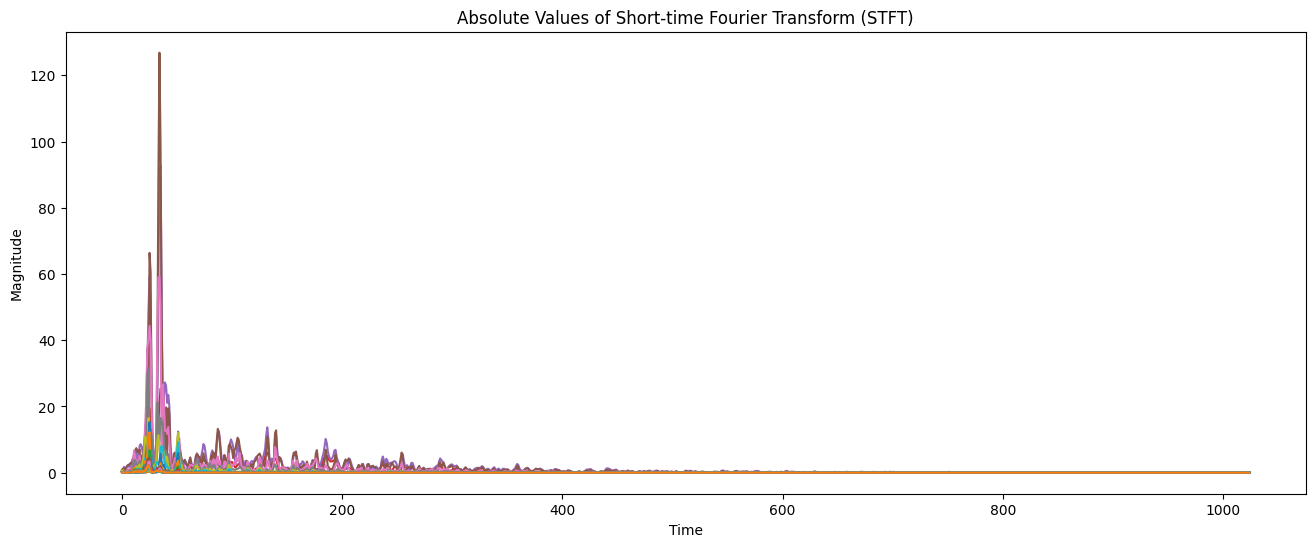

In [ ]:
# Default FFT window size and hop length
n_fft = 2048  # FFT window size
hop_length = 512  # Hop length

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

print('Shape of D object:', np.shape(D))

# Plot the absolute values of STFT
plt.figure(figsize=(16, 6))
plt.plot(D)
plt.title('Absolute Values of Short-time Fourier Transform (STFT)')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()


#The Spectrogram

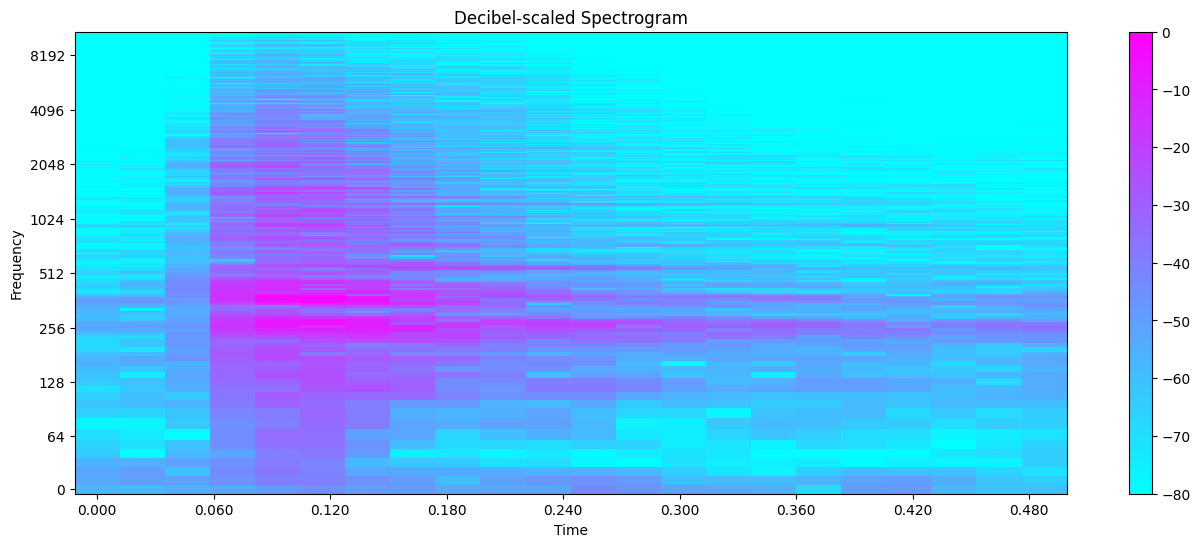

In [ ]:
# Default FFT window size and hop length
n_fft = 2048  # FFT window size
hop_length = 512  # Hop length

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

# Convert amplitude spectrogram to decibel-scaled spectrogram
DB = librosa.amplitude_to_db(D, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title('Decibel-scaled Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


#Mel Spectrogram


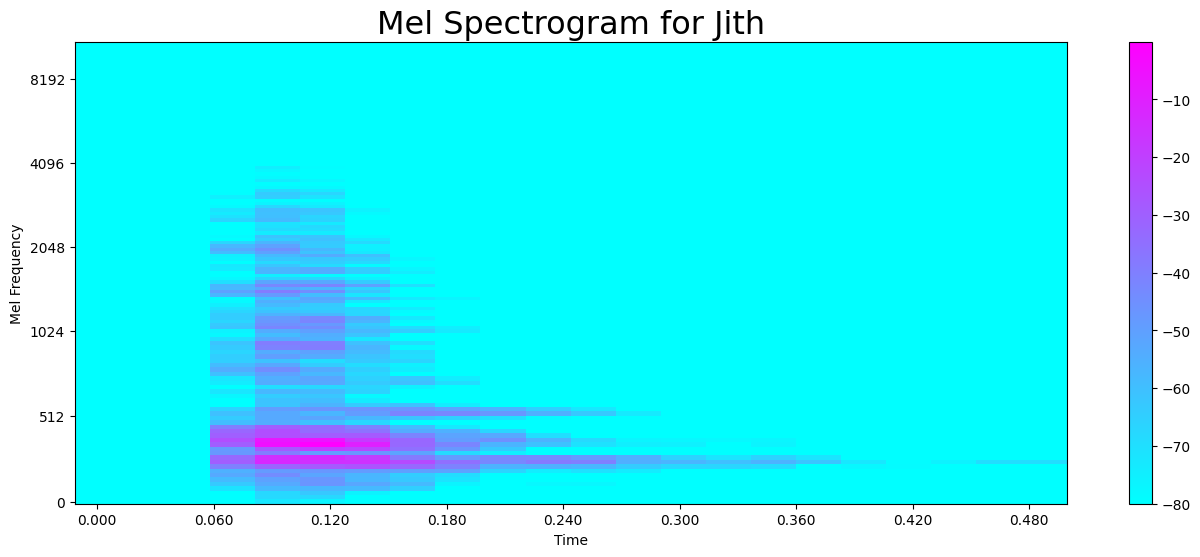

In [ ]:
# Load the audio file and trim silence
y, sr = librosa.load('/content/gdrive/MyDrive/audio classification/Gataberaya/Jith 4-5.wav')
y, _ = librosa.effects.trim(y)

# Define hop length (same as previously used)
hop_length = 512

# Compute the Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)

# Convert amplitude spectrogram to decibel-scaled spectrogram
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the Mel Spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap='cool')
plt.colorbar()
plt.title("Mel Spectrogram for Jith", fontsize=23)
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


##*Audio* *Features*

#Zero Crossing Rate

In [ ]:
# Load the audio file
y, sr = librosa.load('/content/gdrive/MyDrive/audio classification/Gataberaya/Jith 4-5.wav')

# Compute zero crossings
zero_crossings = librosa.zero_crossings(y, pad=False)

# Print the total number of zero crossings
print("Total number of zero crossings:", sum(zero_crossings))


Total number of zero crossings: 364


# Harmonics and Perceptrual


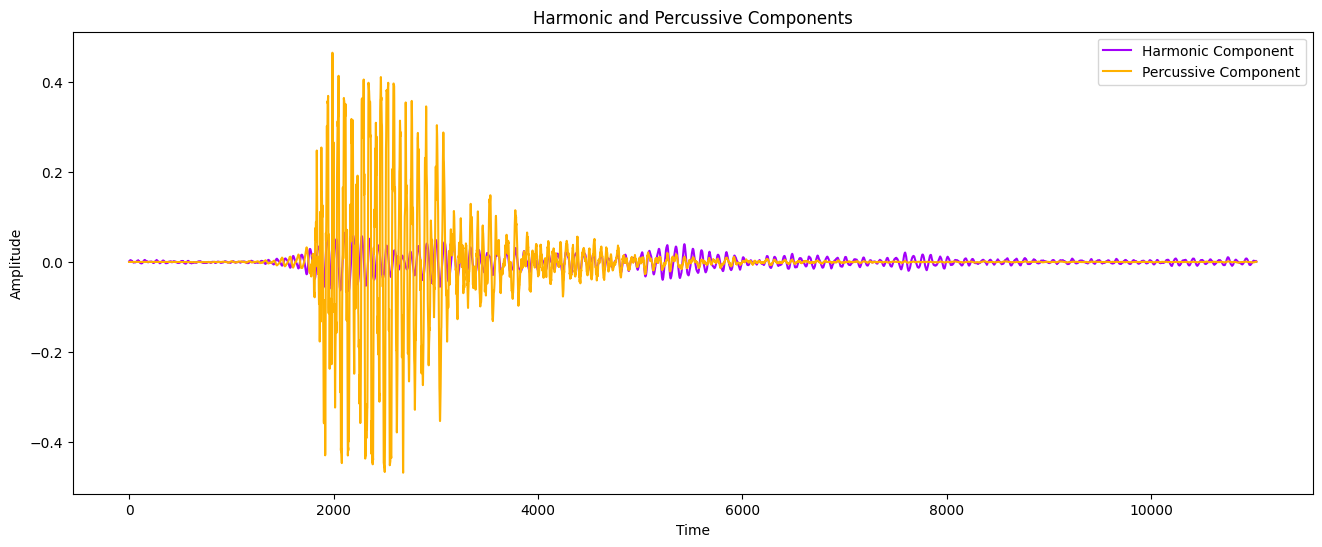

In [ ]:
# Load the audio file
y, sr = librosa.load('/content/gdrive/MyDrive/audio classification/Gataberaya/Jith 4-5.wav')

# Separate harmonic and percussive components
y_harm, y_perc = librosa.effects.hpss(y)

# Plot harmonic and percussive components
plt.figure(figsize=(16, 6))
plt.plot(y_harm, color='#A300F9', label='Harmonic Component')
plt.plot(y_perc, color='#FFB100', label='Percussive Component')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Harmonic and Percussive Components')
plt.legend()
plt.show()


#Tempo BMP (beats per minute)

In [ ]:
# Load the audio file
y, sr = librosa.load('/content/gdrive/MyDrive/audio classification/Gataberaya/Jith 4-5.wav')

# Compute beat tempo
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

# Print the tempo
print("Estimated Tempo:", tempo)


Estimated Tempo: 117.45383522727273


#Spectral Centroid

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


Centroids: [1374.98057395 1484.63112719 1611.41807841 1528.11420083 1469.85148359
 1312.32481009 1099.43893314 1151.21195052 1282.87860328 1351.5575307
 1217.93845882 1058.66114204 1113.25908947 1060.11053764 1028.68918917
  897.91740031  958.19614617 1088.56645997 1229.1483334  1297.94567024
 1173.4846742  1046.4865959 ] 

Shape of Spectral Centroids: (22,) 

frames: range(0, 22) 

t: [0.         0.02321995 0.04643991 0.06965986 0.09287982 0.11609977
 0.13931973 0.16253968 0.18575964 0.20897959 0.23219955 0.2554195
 0.27863946 0.30185941 0.32507937 0.34829932 0.37151927 0.39473923
 0.41795918 0.44117914 0.46439909 0.48761905]


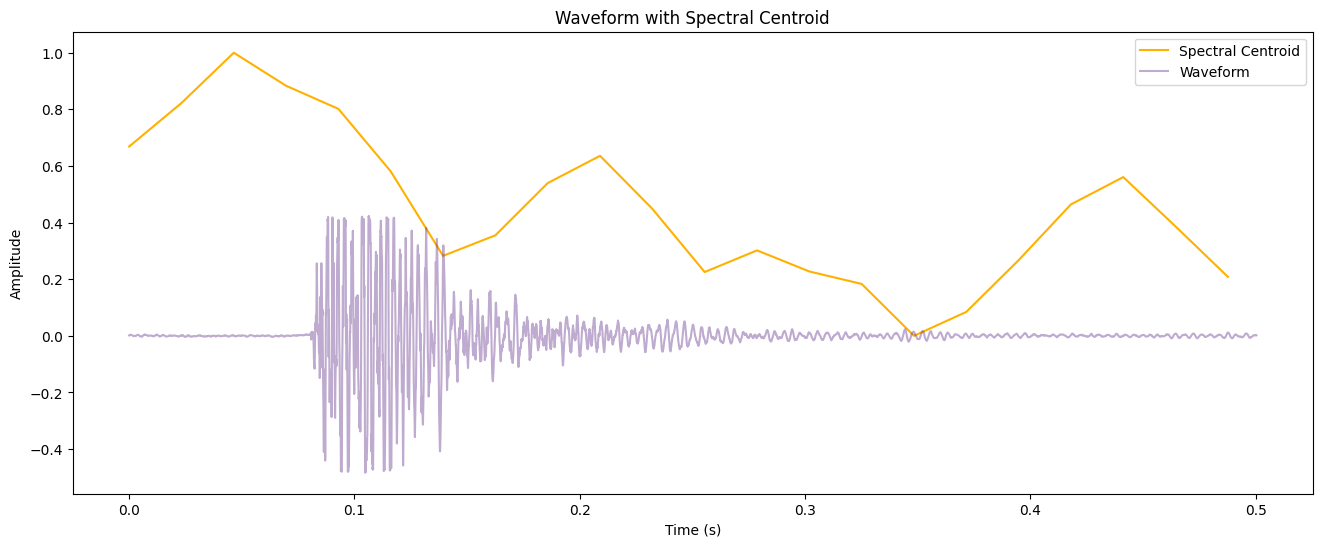

In [ ]:
# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
plt.plot(t, normalize(spectral_centroids), color='#FFB100', label='Spectral Centroid')
plt.plot(np.linspace(0, len(y) / sr, len(y)), y, color='#5F2D87', label='Waveform', alpha=0.4)
plt.title('Waveform with Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


#Spectral Rolloff

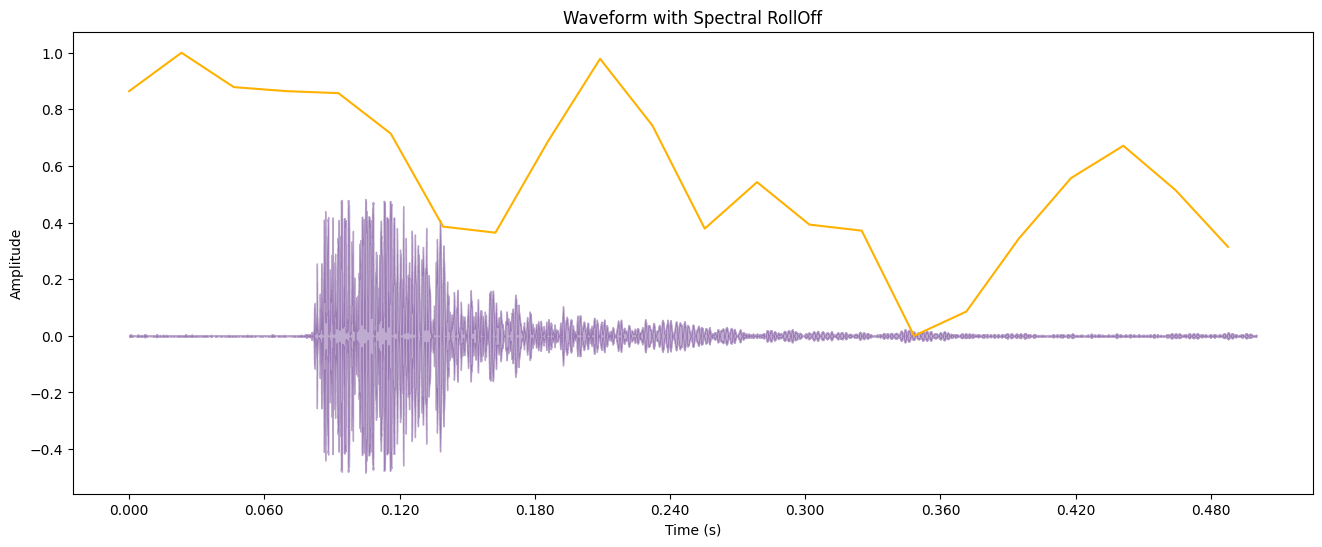

In [ ]:
# Calculate the Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

# Normalising the spectral rolloff for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the Spectral RollOff along the waveform
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#5F2D87')
plt.plot(t, normalize(spectral_rolloff), color='#FFB100')
plt.title('Waveform with Spectral RollOff')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


#Mel-Frequency Cepstral Coefficients

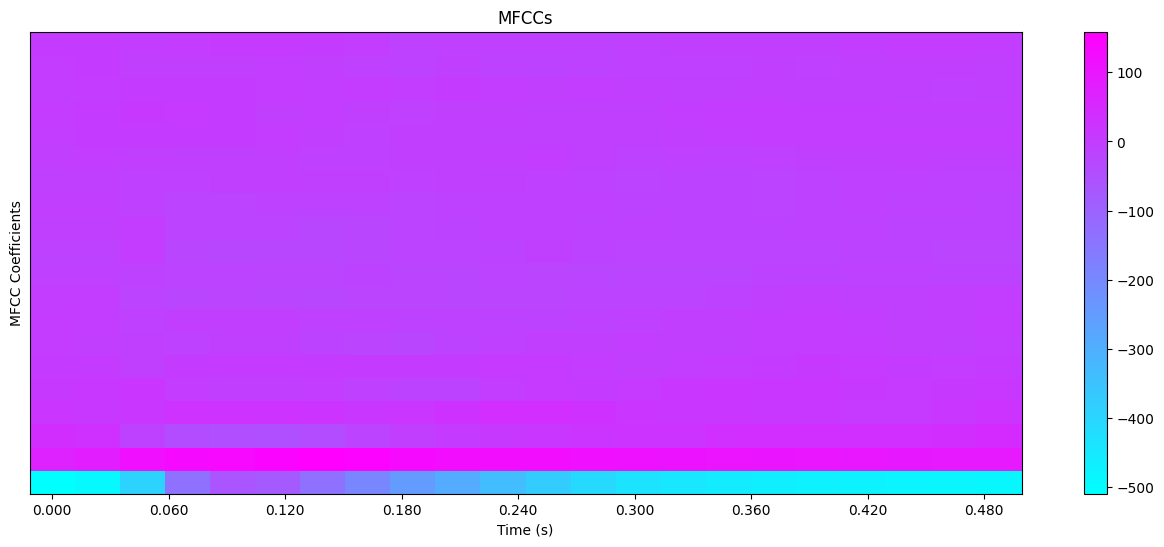

MFCCs shape: (20, 22)


In [ ]:
# Load the audio file
y, sr = librosa.load('/content/gdrive/MyDrive/audio classification/Gataberaya/Jith 4-5.wav')

# Calculate the MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Display the MFCCs
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

# Print the shape of MFCCs
print('MFCCs shape:', mfccs.shape)


Mean: -4.8767435e-09
Variance: 0.99999994


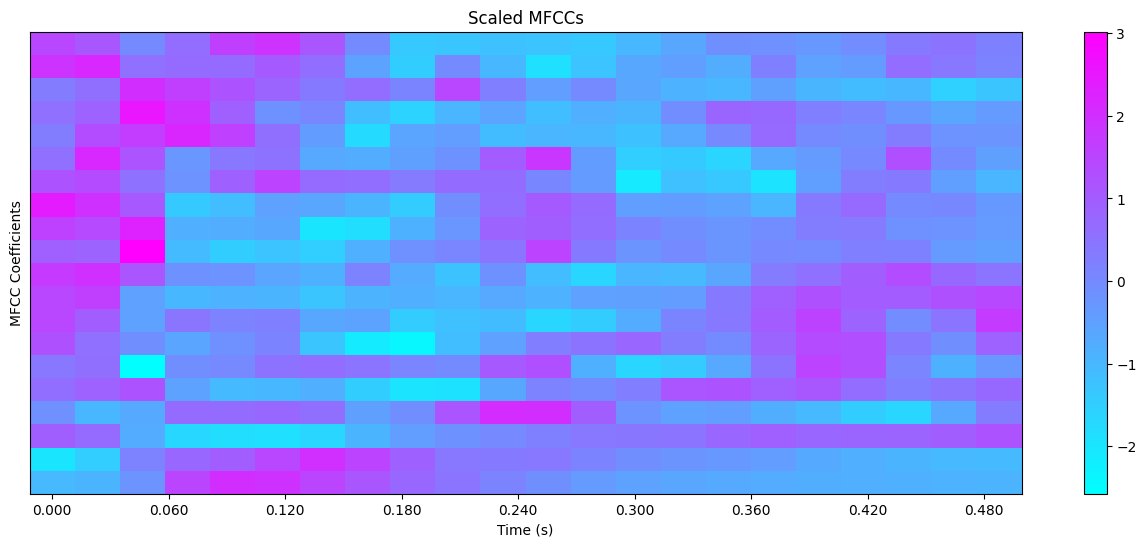

In [ ]:
# Perform Feature Scaling
mfccs_scaled = sklearn.preprocessing.scale(mfccs, axis=1)

# Print mean and variance after scaling
print('Mean:', mfccs_scaled.mean())
print('Variance:', mfccs_scaled.var())

# Display the scaled MFCCs
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs_scaled, sr=sr, x_axis='time', cmap='cool')
plt.colorbar()
plt.title('Scaled MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


#Chroma Frequencies

Chromogram shape: (12, 3)


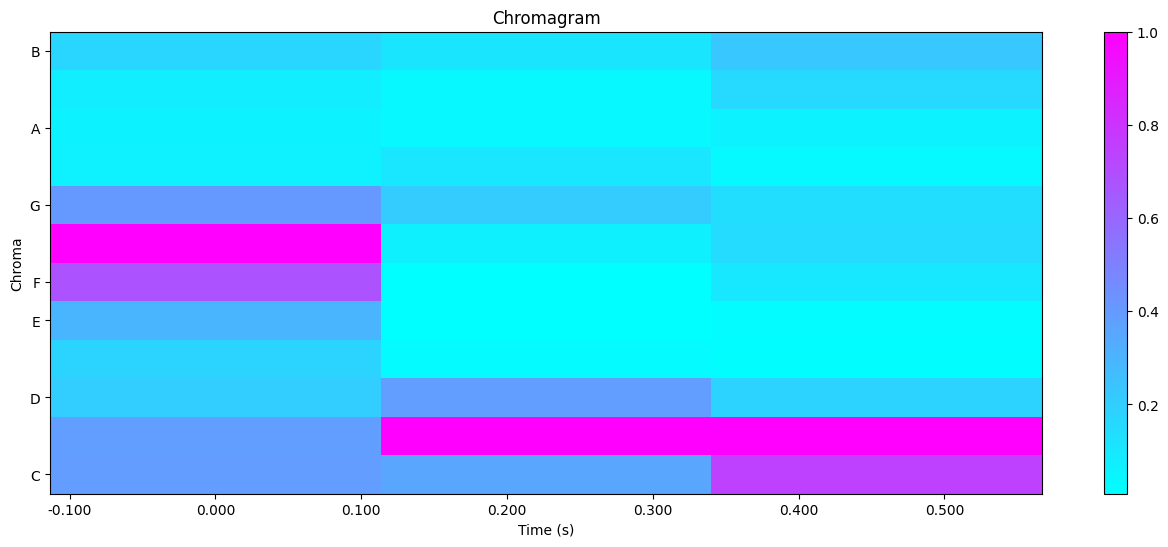

In [ ]:
# Load the audio file
y, sr = librosa.load('/content/gdrive/MyDrive/audio classification/Gataberaya/Jith 4-5.wav')

# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

# Plot the chromagram
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='cool')
plt.colorbar()
plt.title('Chromagram')
plt.xlabel('Time (s)')
plt.ylabel('Chroma')
plt.show()
